# Exploratory Data Analysis

In [57]:
import pandas as pd
import numpy as np
import altair as alt

In [69]:
alt.data_transformers.enable('json')

DataTransformerRegistry.enable('json')

In [58]:
ORD = pd.read_csv('../data/ORD.csv', index_col='Unnamed: 0')

In [59]:
ORD_train = ORD[ORD['year'] < 2018]

In [64]:
ORD_train.head(5)

,year,month,day,hour,rides,tmpf,dwpf,relh,sknt,p01i,vsby,feel,skyc,seats,airline
0,2013,1,1,0,22,24.98,17.96,74.290000,9.000000,0.0,9.000000,14.780000,3.000000,464.876254,3.0
1,2013,1,1,1,9,24.89,17.78,73.995000,9.000000,0.0,8.000000,14.670000,5.000000,147.962430,1.0
2,2013,1,1,2,11,21.20,14.00,73.320000,10.000000,0.0,9.000000,9.420000,5.000000,NaN,NaN
3,2013,1,1,3,3,21.14,12.14,67.723333,10.666667,0.0,9.666667,8.976667,4.333333,NaN,NaN
4,2013,1,1,4,5,19.94,10.94,67.580000,10.000000,0.0,10.000000,7.840000,5.000000,847.150186,4.0


In [60]:
def lag_df(df, lag, cols):
    return df.assign(**{f"{col}-{n}": df[col].shift(n) for n in range(1, lag + 1) for col in cols})

In [61]:
lag = 3
ORD_train_lag = lag_df(ORD_train, lag=lag, cols=['seats'])
#ORD_train_lag = lag_df(ORD_train, lag=lag, cols=ORD_train.columns.tolist())

In [62]:
ORD_train_lag

,year,month,day,hour,rides,tmpf,dwpf,relh,sknt,p01i,vsby,feel,skyc,seats,airline,seats-1,seats-2,seats-3
0,2013,1,1,0,22,24.98,17.96,74.290000,9.000000,0.0,9.000000,14.780000,3.000000,464.876254,3.0,NaN,NaN,NaN
1,2013,1,1,1,9,24.89,17.78,73.995000,9.000000,0.0,8.000000,14.670000,5.000000,147.962430,1.0,464.876254,NaN,NaN
2,2013,1,1,2,11,21.20,14.00,73.320000,10.000000,0.0,9.000000,9.420000,5.000000,NaN,NaN,147.962430,464.876254,NaN
3,2013,1,1,3,3,21.14,12.14,67.723333,10.666667,0.0,9.666667,8.976667,4.333333,NaN,NaN,NaN,147.962430,464.876254
4,2013,1,1,4,5,19.94,10.94,67.580000,10.000000,0.0,10.000000,7.840000,5.000000,847.150186,4.0,NaN,NaN,147.962430
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43757,2017,12,31,19,159,12.90,-2.00,50.620000,12.769231,0.0,10.000000,-3.460000,2.923077,4652.273120,37.0,6279.424095,3469.881437,4896.180254
43758,2017,12,31,20,100,12.90,-2.90,48.500000,13.153846,0.0,10.000000,-2.900000,0.230769,2201.296388,15.0,4652.273120,6279.424095,3469.881437
43759,2017,12,31,21,62,10.90,-4.00,50.280000,12.307692,0.0,10.000000,-5.460000,0.230769,1456.971367,10.0,2201.296388,4652.273120,6279.424095
43760,2017,12,31,22,53,9.00,-4.00,54.740000,11.666667,0.0,10.000000,-5.090000,0.307692,1338.399399,9.0,1456.971367,2201.296388,4652.273120


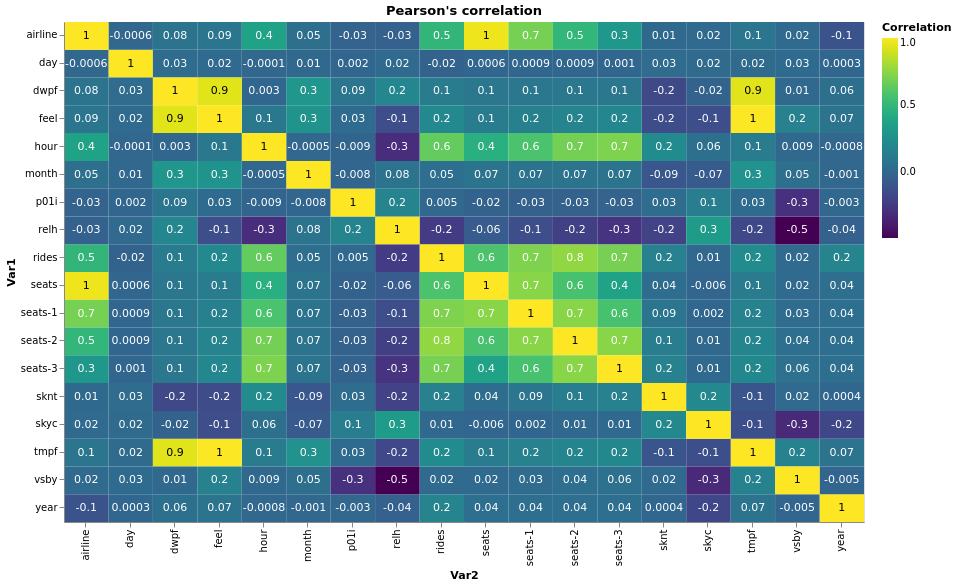

In [63]:
ORD_corr = ORD_train_lag.corr().reset_index().rename(columns = {'index':'Var1'}).melt(id_vars = ['Var1'],
                                                                                    value_name = 'Correlation',
                                                                                    var_name = 'Var2')
base = alt.Chart(ORD_corr).encode(
    alt.Y('Var1:N'),
    alt.X('Var2:N')
) 

heatmap = base.mark_rect().encode(
     alt.Color('Correlation:Q',
                scale=alt.Scale(scheme='viridis'))
)

text = base.mark_text(baseline='middle').encode(
    text=alt.Text('Correlation:Q', format='.1'),
    color=alt.condition(
        alt.datum.Correlation >= 0.90,
        alt.value('black'),
        alt.value('white')
    )
)

(heatmap + text).properties(
    width = 800,
    height = 500,
    title = "Pearson's correlation"
)

In [112]:
p1 = alt.Chart(ORD_train).mark_trail().encode(
    x = alt.X('hour:N'),
    y = alt.Y('mean(seats):Q'),
    color = alt.Color('year:N')
)

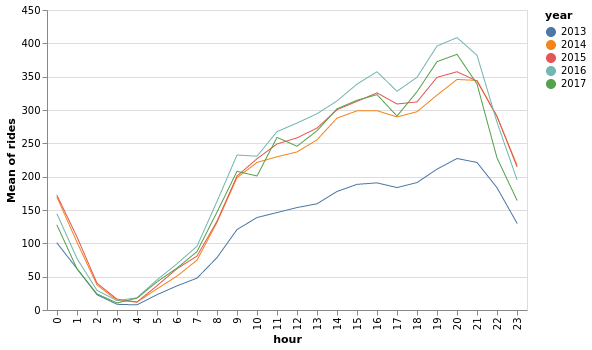

In [80]:
alt.Chart(ORD_train).mark_trail().encode(
    x = alt.X('hour:N'),
    y = alt.Y('mean(rides):Q'),
    color = alt.Color('year:N')
)

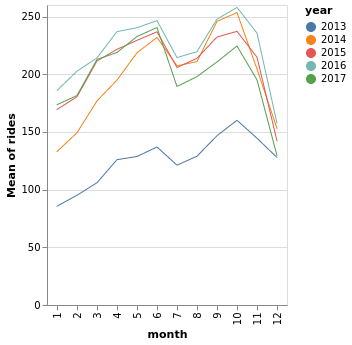

In [81]:
alt.Chart(ORD_train).mark_trail().encode(
    x = alt.X('month:N'),
    y = alt.Y('mean(rides):Q'),
    color = alt.Color('year:N')
)

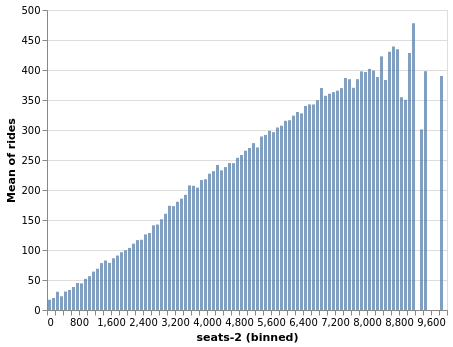

In [107]:
alt.Chart(ORD_train_lag).mark_bar(opacity=0.7).encode(
    x = alt.X('seats-2:Q', bin=alt.Bin(extent=[0, 10000], step=100)),
    y = alt.Y('mean(rides):Q')
)

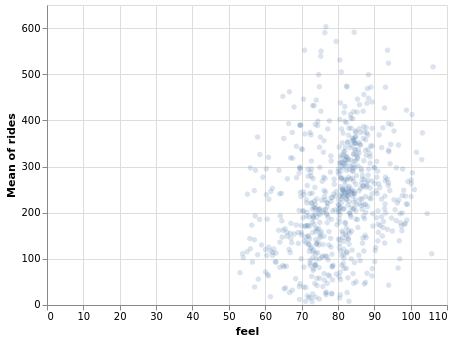

In [94]:
alt.Chart(ORD_train.query('month == 7')).mark_circle(opacity=0.2).encode(
    x = alt.X('feel:Q'),
    y = alt.Y('mean(rides):Q')
)

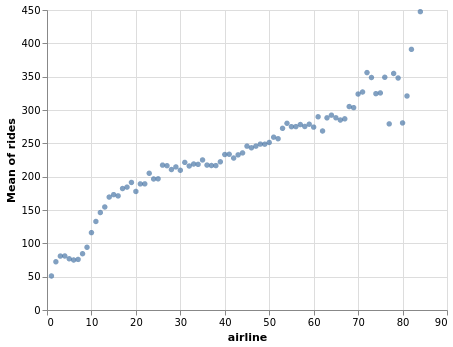

In [109]:
alt.Chart(ORD_train_lag).mark_circle(opacity=0.7).encode(
    x = alt.X('airline:Q'),
    y = alt.Y('mean(rides):Q')
)

In [113]:
p2 = alt.Chart(ORD_train).mark_trail().encode(
    x = alt.X('hour:N'),
    y = alt.Y('mean(rides):Q')
)

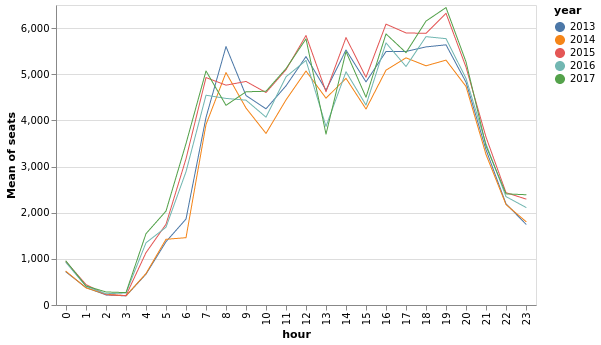

In [125]:
p1

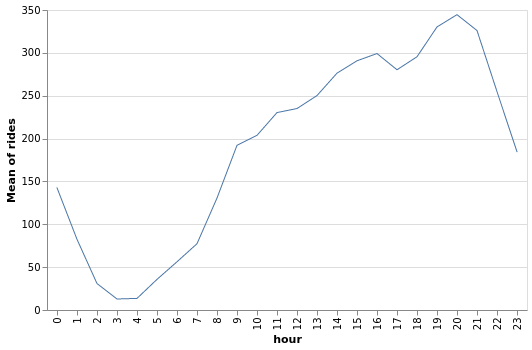

In [126]:
p2